In [160]:
import glob
import json

import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import pandas as pd

In [144]:
datasets_path = "..\\datasets\\dataset_arena_2021"

In [145]:
info_folder = glob.glob(datasets_path+"\\"+"Dataset*")[0]
definitions_file = open(info_folder+"\\annotation_definitions.json")
definitions = json.load(definitions_file)
definitions_file.close()

In [173]:
labels = {}
alias = {}

mostrador_ids = []
mostrador_base_id = 0

equipamento_ids = []
equipamento_base_id = 0

definition_codes = {}

for definition in definitions["annotation_definitions"]:
    definition_codes[definition["name"]] = definition["id"]

    if definition["name"] == "bounding box":
        for spec in definition["spec"]:
            labels[spec["label_id"]] = {"name": spec["label_name"], "count":0, "imgs":[]}

            if spec["label_name"][:9] == "Mostrador":
                mostrador_ids.append(spec["label_id"])

                if len(spec["label_name"]) == 9:
                    mostrador_base_id = spec["label_id"]

            if spec["label_name"][:11] == "Equipamento":
                equipamento_ids.append(spec["label_id"])

                if len(spec["label_name"]) == 11:
                    equipamento_base_id = spec["label_id"]

        
        break

alias[mostrador_base_id] = mostrador_ids
alias[equipamento_base_id] = equipamento_ids

print(list(labels.items())[1:10])
print(list(labels.items())[-10:])

[(2, {'name': 'Equipamento', 'count': 0, 'imgs': []}), (3, {'name': 'EquipamentoA', 'count': 0, 'imgs': []}), (4, {'name': 'EquipamentoB', 'count': 0, 'imgs': []}), (5, {'name': 'EquipamentoC', 'count': 0, 'imgs': []}), (6, {'name': 'EquipamentoD', 'count': 0, 'imgs': []}), (7, {'name': 'EquipamentoE', 'count': 0, 'imgs': []}), (8, {'name': 'Mostrador', 'count': 0, 'imgs': []}), (9, {'name': 'Mostrador_00_-10', 'count': 0, 'imgs': []}), (10, {'name': 'Mostrador_00_10', 'count': 0, 'imgs': []})]
[(4002, {'name': 'Mostrador_99_18', 'count': 0, 'imgs': []}), (4003, {'name': 'Mostrador_99_-8', 'count': 0, 'imgs': []}), (4004, {'name': 'Mostrador_99_8', 'count': 0, 'imgs': []}), (4005, {'name': 'Mostrador_99_-19', 'count': 0, 'imgs': []}), (4006, {'name': 'Mostrador_99_19', 'count': 0, 'imgs': []}), (4007, {'name': 'Mostrador_99_-9', 'count': 0, 'imgs': []}), (4008, {'name': 'Mostrador_99_9', 'count': 0, 'imgs': []}), (4009, {'name': 'Base_Inicial', 'count': 0, 'imgs': []}), (4010, {'name':

In [174]:
bb_code = definition_codes["bounding box"]

empty_img = 0
n_img = 0
obj_img = 0

info_folders = glob.glob(datasets_path+"\\"+"Dataset*")

for info_folder in info_folders: # Itera nos datasets
    captures_files = glob.glob(info_folder+"\\captures_*.json")

    for captures_file in captures_files: # Itera nos arquivos JSON
        fl = open(captures_file)
        captures = json.load(fl)
        fl.close()

        for capture in captures["captures"]: # Itera nas imagens
            for annotation in capture["annotations"]: # Procura as bb
                if annotation["annotation_definition"] == bb_code: # É bb

                    if len(annotation["values"]) == 0: # Está vazio
                        empty_img += 1
                    else:
                        obj_img += len(annotation["values"])

                        for obj in annotation["values"]:
                            labels[obj["label_id"]]["count"] += 1
                            labels[obj["label_id"]]["imgs"].append(capture["filename"])
                    n_img += 1

                    break

for main_id in alias:
    for alias_id in alias[main_id]:
        labels[main_id]["count"] += labels[alias_id]["count"]

obj_img /= n_img
obj_img

0.4166969147005445

In [175]:
count_ids = []
count_labels = []
count = []

for label_id in labels:
    is_alias = False
    for alias_id in alias:
        if label_id == alias_id:
            break
        if label_id in alias[alias_id]:
            is_alias = True
            break
    if is_alias:
        continue

    count_ids.append(label_id)
    count_labels.append(labels[label_id]["name"])
    count.append(labels[label_id]["count"])

count_ids.append(0)
count_labels.append("Empty")
count.append(empty_img)

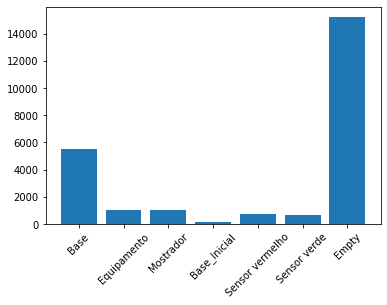

In [176]:
plt.bar(count_labels, count)
plt.xticks(rotation=45)
plt.show()

In [179]:
pd.DataFrame(labels).transpose()

,name,count,imgs
1,Base,5528,[RGBd8aeb9af-e5f9-4185-a7d5-3eeb10ff55fd/rgb_2...
2,Equipamento,1032,[RGB5333dc96-2af4-45d0-8d44-241f4cef9b39/rgb_1...
3,EquipamentoA,206,[RGBd8aeb9af-e5f9-4185-a7d5-3eeb10ff55fd/rgb_8...
4,EquipamentoB,223,[RGBd8aeb9af-e5f9-4185-a7d5-3eeb10ff55fd/rgb_9...
5,EquipamentoC,194,[RGBd8aeb9af-e5f9-4185-a7d5-3eeb10ff55fd/rgb_5...
...,...,...,...
4007,Mostrador_99_-9,0,[]
4008,Mostrador_99_9,0,[]
4009,Base_Inicial,185,[RGBa63d030d-33e9-4559-9576-4284b63f56a1/rgb_3...
4010,Sensor vermelho,711,[RGBdf457955-7360-4b60-95eb-d3ccd5b31ab5/rgb_6...


In [187]:
import sys
sys.getsizeof(img)/10E+3

178.9918

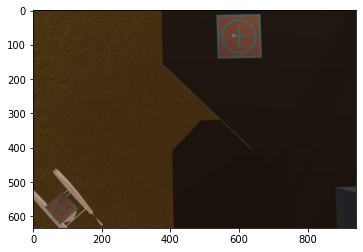

In [188]:
img = cv.imread(datasets_path+"\\"+labels[1]["imgs"][1])
plt.imshow(img)

In [191]:
n_img * sys.getsizeof(img)/10E+6

3944.979272

In [192]:
n_img

22040

In [193]:
empty_img

15212

In [194]:
n_img-empty_img

6828

In [2]:
bb_code

NameError: name 'bb_code' is not defined